In [1]:
#Import Of Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data Pre-Processing
data=pd.read_csv("master.csv")

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [5]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]

In [6]:
data.drop(" gdp_for_year",axis=1,inplace=True)

In [8]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [12]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

In [14]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2.156625e+09
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2.156625e+09
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2.156625e+09
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2.156625e+09
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2.156625e+09


In [15]:
def f(a):
    if(a=="male"):
        return 1
    else:
        return 0
data["sex"]=data.sex.apply(f)

In [16]:
data=data.fillna(0)

In [17]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,0.0,796,Generation X,2.156625e+09
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,0.0,796,Silent,2.156625e+09
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,0.0,796,Generation X,2.156625e+09
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,0.0,796,G.I. Generation,2.156625e+09
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,0.0,796,Boomers,2.156625e+09


In [18]:
data.drop("country",axis=1,inplace=True)
data.drop("country-year",axis=1,inplace=True)
data.drop("age",axis=1,inplace=True)

In [19]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,Generation X,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,Silent,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,Generation X,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,G.I. Generation,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,Boomers,2.156625e+09


In [20]:
data.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [21]:
def g(a):
    if(a=="Generation X"):
        return 0
    elif(a=="Silent"):
        return 1
    elif(a=="G.I. Generation"):
        return 2
    elif(a=="Boomers"):
        return 3
    elif(a=="Millenials"):
        return 4
    elif(a=="Generation Z"):
        return 5
    else:
        return 6
data["generation"]=data.generation.apply(g)

In [22]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,0,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,1,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,0,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,2,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,3,2.156625e+09


In [23]:
data.dtypes

year                   int64
sex                    int64
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita         int64
generation             int64
gdp_for_year         float64
dtype: object

In [24]:
#Correlation Matrix
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,0.236322,9.452857e-02
sex,0.000000,1.000000e+00,0.144629,-0.011242,0.391496,3.061582e-18,1.336263e-18,0.000000,-7.757932e-19
suicides_no,-0.004546,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-0.042450,4.300959e-01
population,0.008850,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,0.014000,7.106973e-01
suicides/100k pop,-0.039037,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-0.160583,2.523964e-02
HDI for year,0.343190,3.061582e-18,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,0.069649,7.375306e-02
gdp_per_capita,0.339134,1.336263e-18,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,0.083537,3.034045e-01
generation,0.236322,0.000000e+00,-0.042450,0.014000,-0.160583,6.964930e-02,8.353672e-02,1.000000,2.524939e-02
gdp_for_year,0.094529,-7.757932e-19,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,0.025249,1.000000e+00


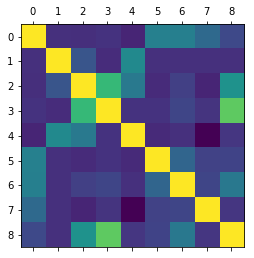

In [25]:
plt.matshow(data.corr())
plt.show()

In [30]:
#Train and Test Data
train=data.drop("suicides_no",axis=1)
test=data["suicides_no"]

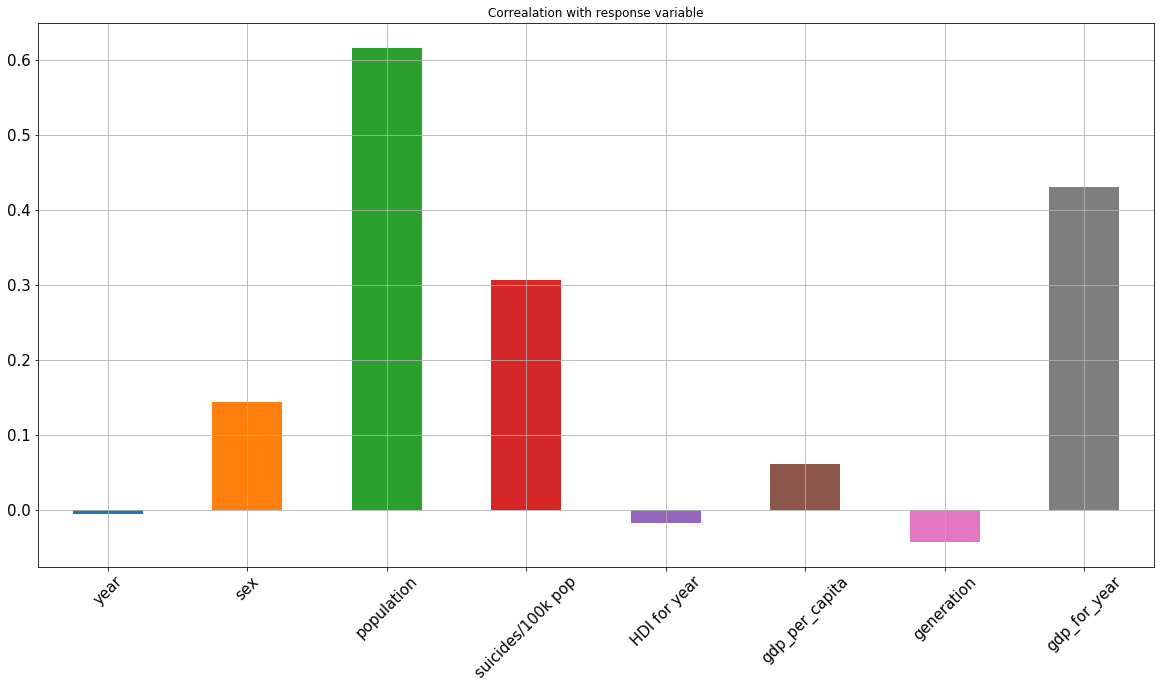

In [33]:
train.corrwith(test).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

In [34]:
#Library for Training Model
from sklearn import model_selection

In [35]:
#Train Test Split
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

In [36]:
#Training will be done by RandomForest Algorithm
from sklearn.ensemble import RandomForestRegressor

In [37]:
alg=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")

In [38]:
alg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
alg.score(x_train,y_train)

0.9995483077638039

In [40]:
alg.score(x_test,y_test)

0.9967328798947226

In [41]:
y_pred=alg.predict(x_test)

In [42]:
y_pred=y_pred.astype(int)

In [43]:
#Funtion for calculating accuracy of model
def sc(y_truth,y_pred1):
    u=((y_truth-y_pred1)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-(u/v)

In [44]:
acc=sc(y_test,y_pred)

In [45]:
acc

0.9967321442700241

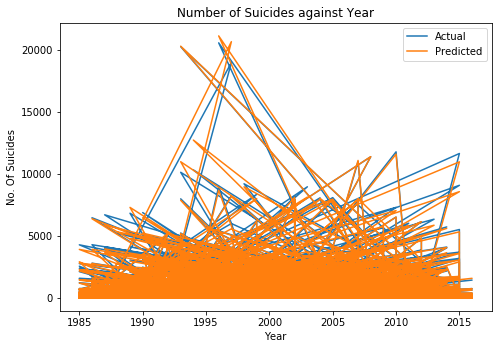

In [49]:
#Plotting of Predicted Data against Actual Data
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
y=y_test
x=x_test["year"]
y1=y_pred
ax.plot(x,y,label="Actual")
ax.plot(x,y1,label="Predicted")
ax.set_xlabel("Year")
ax.set_ylabel("No. Of Suicides")
ax.set_title("Number of Suicides against Year")
ax.legend()

C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Harsh Bansal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


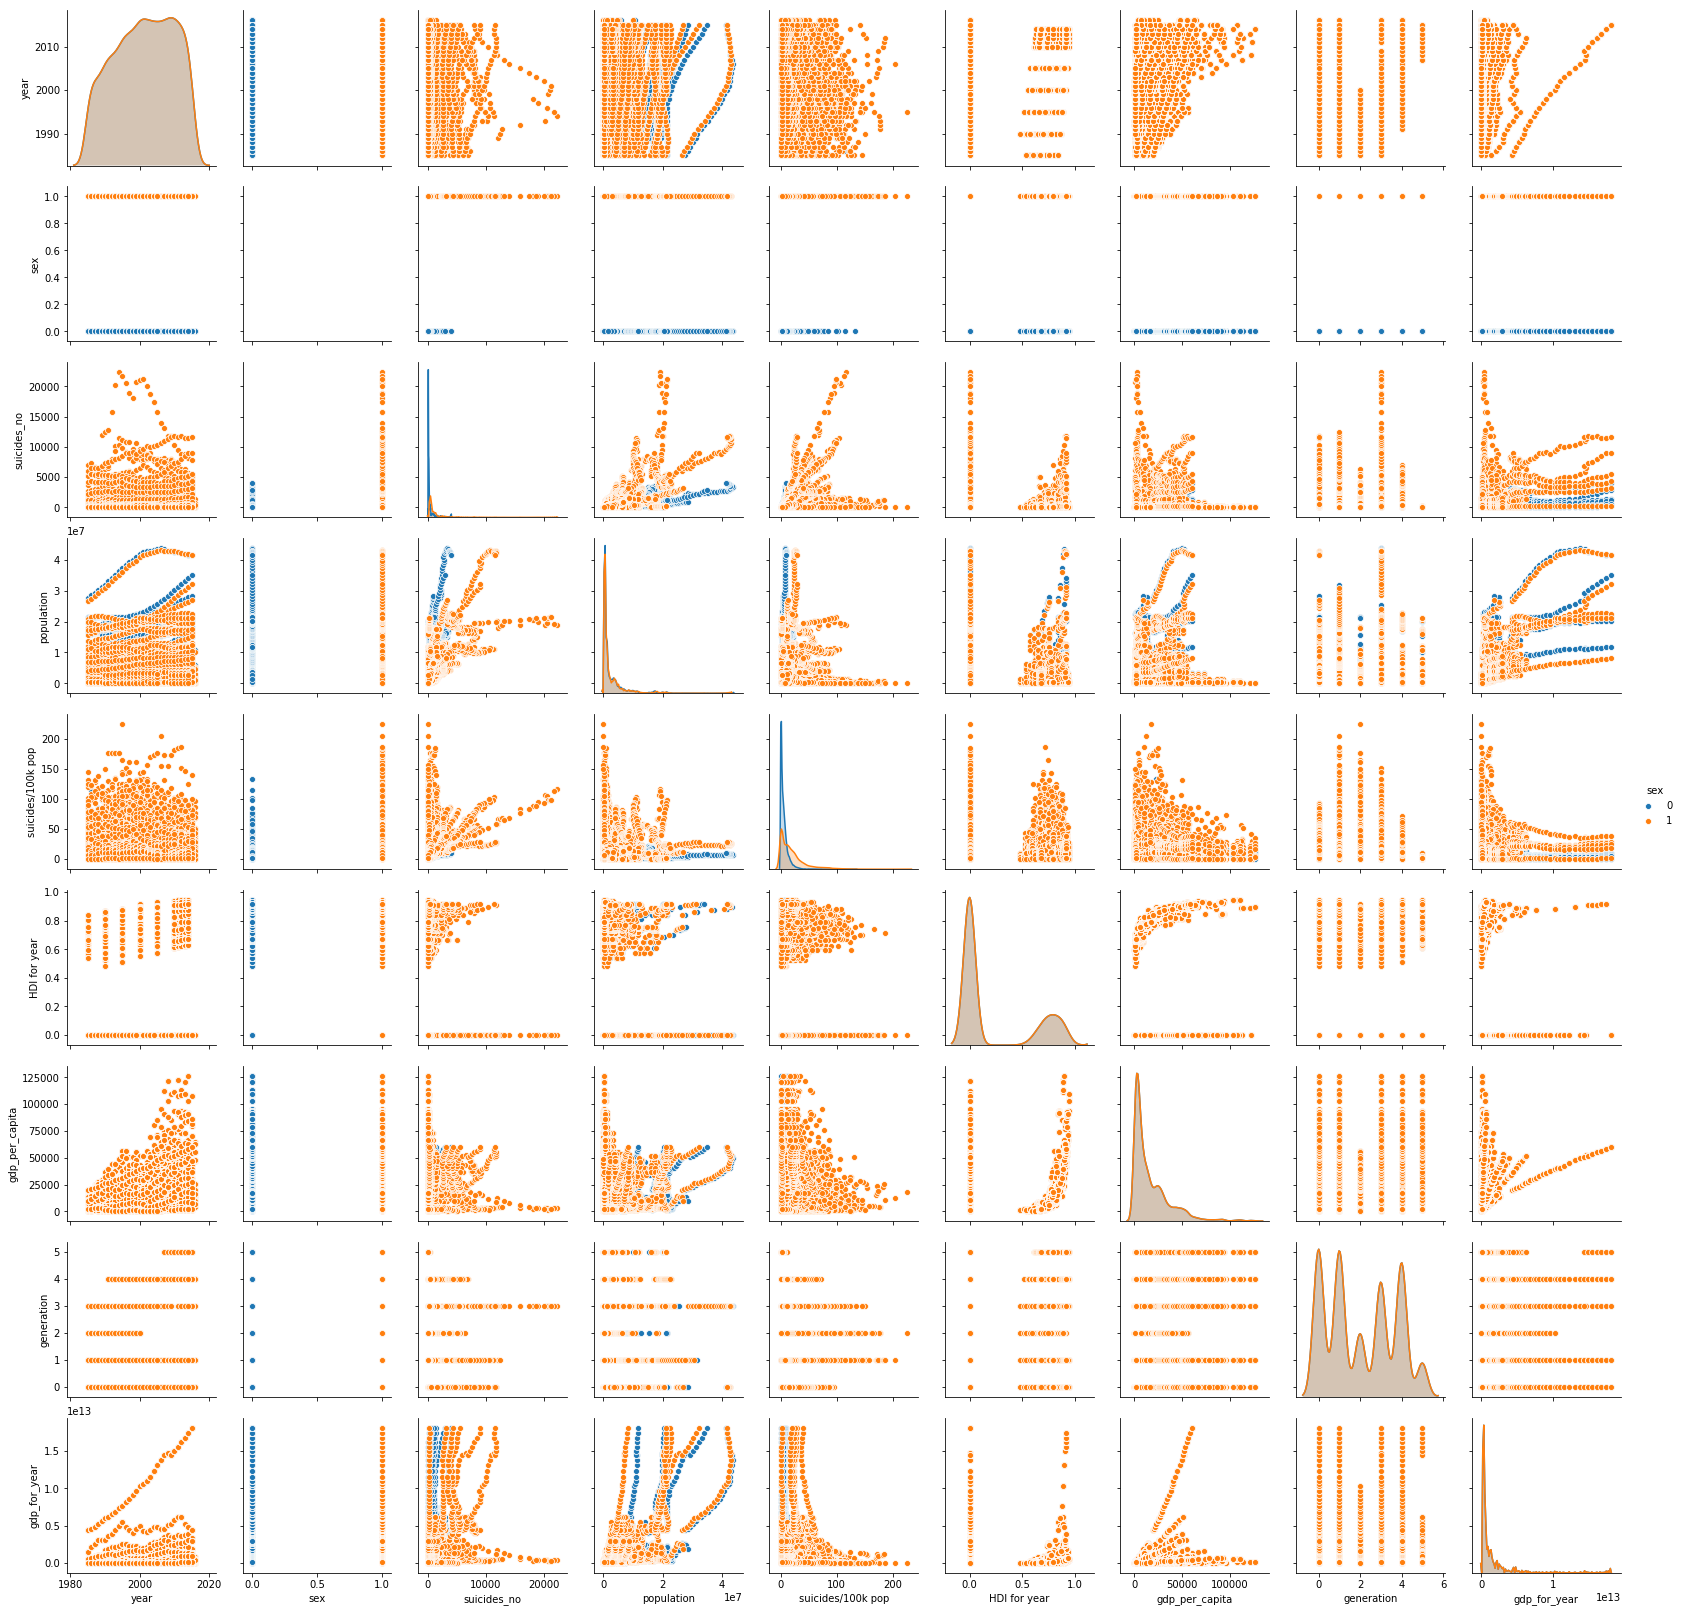

In [59]:
#Analysis Of all feautres 
sns.pairplot(data,hue="sex")

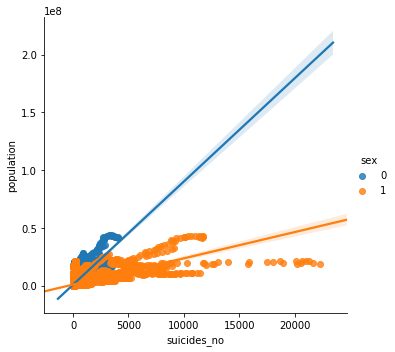

In [63]:
#Regressing Line Plotting
sns.lmplot(x="suicides_no",y="population",data=data,hue="sex")

In [ ]:
"""Conclusions:
1.After trying different regression algorithms randomforest came out to be best on giving 99% accuracy
2.Analysis of all feauture performed that how they change from period
3.Response variable mainly depends on population as by correlation matrix
"""